In [1]:
import os
os.environ['PYSPARK_PYTHON'] = 'python'

from pyspark.sql.functions import *
from pyspark.sql.types import * 

In [5]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 1.9 MB/s  0:00:04m 1.9 MB/s eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 1.7 MB/s  0:00:01m 1.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.3 MB/s  0:00:031.3 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib] 6/7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,mean,stddev,min,max,count
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
spark = SparkSession.builder.appName("Correlation Analysis").getOrCreate()

25/12/01 09:42:26 WARN Utils: Your hostname, Roman-kohohooo.local resolves to a loopback address: 127.0.0.1; using 10.1.24.246 instead (on interface en0)
25/12/01 09:42:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/12/01 09:42:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:

anscombe_data = [

    (10.0, 8.04, 10.0, 9.14, 10.0, 7.46, 8.0, 6.58),

    (8.0, 6.95, 8.0, 8.14, 8.0, 6.77, 8.0, 5.76),

    (13.0, 7.58, 13.0, 8.74, 13.0, 12.74, 8.0, 7.71),

    (9.0, 8.81, 9.0, 8.77, 9.0, 7.11, 8.0, 8.84),

    (11.0, 8.33, 11.0, 9.26, 11.0, 7.81, 8.0, 8.47),

    (14.0, 9.96, 14.0, 8.10, 14.0, 8.84, 8.0, 7.04),

    (6.0, 7.24, 6.0, 6.13, 6.0, 6.08, 8.0, 5.25),

    (4.0, 4.26, 4.0, 3.10, 4.0, 5.39, 19.0, 12.50),

    (12.0, 10.84, 12.0, 9.13, 12.0, 8.15, 8.0, 5.56),

    (7.0, 4.82, 7.0, 7.26, 7.0, 6.42, 8.0, 7.91),

    (5.0, 5.68, 5.0, 4.74, 5.0, 5.73, 8.0, 6.89)

]



In [7]:
columns = ['x1','y1','x2','y2','x3','y3','x4','y4']
anscombe_df = spark.createDataFrame (anscombe_data, columns)
anscombe_df.show()

+----+-----+----+----+----+-----+----+----+
|  x1|   y1|  x2|  y2|  x3|   y3|  x4|  y4|
+----+-----+----+----+----+-----+----+----+
|10.0| 8.04|10.0|9.14|10.0| 7.46| 8.0|6.58|
| 8.0| 6.95| 8.0|8.14| 8.0| 6.77| 8.0|5.76|
|13.0| 7.58|13.0|8.74|13.0|12.74| 8.0|7.71|
| 9.0| 8.81| 9.0|8.77| 9.0| 7.11| 8.0|8.84|
|11.0| 8.33|11.0|9.26|11.0| 7.81| 8.0|8.47|
|14.0| 9.96|14.0| 8.1|14.0| 8.84| 8.0|7.04|
| 6.0| 7.24| 6.0|6.13| 6.0| 6.08| 8.0|5.25|
| 4.0| 4.26| 4.0| 3.1| 4.0| 5.39|19.0|12.5|
|12.0|10.84|12.0|9.13|12.0| 8.15| 8.0|5.56|
| 7.0| 4.82| 7.0|7.26| 7.0| 6.42| 8.0|7.91|
| 5.0| 5.68| 5.0|4.74| 5.0| 5.73| 8.0|6.89|
+----+-----+----+----+----+-----+----+----+



In [22]:
dataset1 = anscombe_df.select('x1','y1')
dataset1.show()


+----+-----+
|  x1|   y1|
+----+-----+
|10.0| 8.04|
| 8.0| 6.95|
|13.0| 7.58|
| 9.0| 8.81|
|11.0| 8.33|
|14.0| 9.96|
| 6.0| 7.24|
| 4.0| 4.26|
|12.0|10.84|
| 7.0| 4.82|
| 5.0| 5.68|
+----+-----+



In [23]:
summary = dataset1.select(
    mean('x1'), stddev('x1'), min('x1'), mean('y1'),stddev('y1') )
summary.show()
    


+-------+------------------+-------+-----------------+-----------------+
|avg(x1)|   stddev_samp(x1)|min(x1)|          avg(y1)|  stddev_samp(y1)|
+-------+------------------+-------+-----------------+-----------------+
|    9.0|3.3166247903553994|    4.0|7.500909090909091|2.031568135925815|
+-------+------------------+-------+-----------------+-----------------+



In [25]:
dataset1_pd = dataset1.toPandas()


In [26]:
dataset1_pd.describe()

,x1,y1
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [28]:
correlation = np.corrcoef(dataset1_pd['x1'], dataset1_pd['y1'])
correlation

array([[1.        , 0.81642052],
       [0.81642052, 1.        ]])

In [29]:
correlation = correlation[0,1]
correlation

np.float64(0.81642051634484)

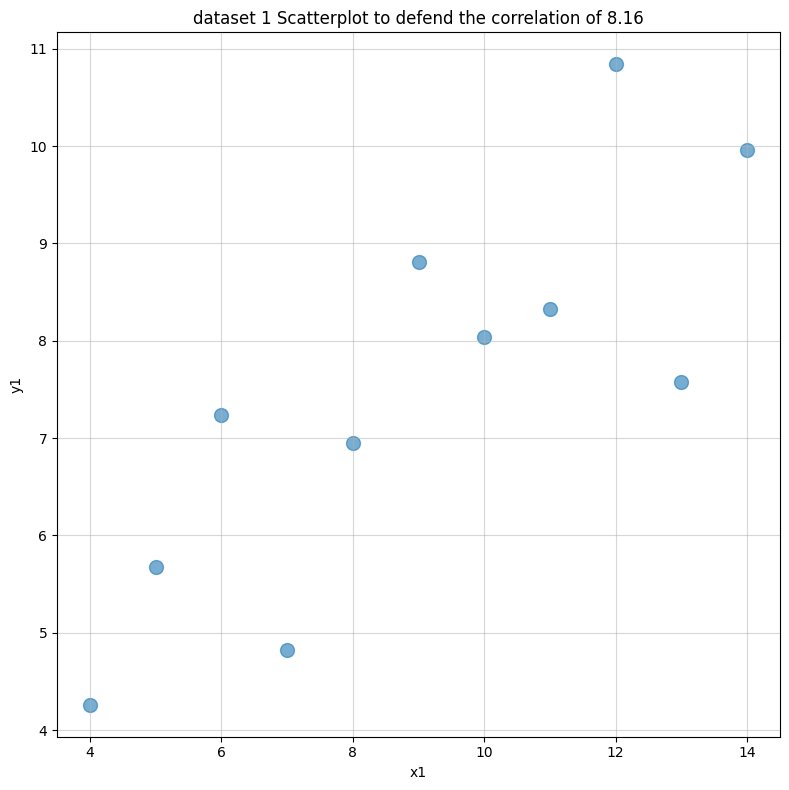

In [31]:
plt.figure(figsize = (8,8))
plt.scatter(dataset1_pd['x1'],dataset1_pd['y1'], alpha = 0.6, s=100)
plt.xlabel('x1')
plt.ylabel('y1')
plt.title("dataset 1 Scatterplot to defend the correlation of 8.16")
plt.grid(True, alpha = 0.5)
plt.tight_layout()

In [33]:
dataset2 = anscombe_df.select('x2','y2')
dataset2.show()

+----+----+
|  x2|  y2|
+----+----+
|10.0|9.14|
| 8.0|8.14|
|13.0|8.74|
| 9.0|8.77|
|11.0|9.26|
|14.0| 8.1|
| 6.0|6.13|
| 4.0| 3.1|
|12.0|9.13|
| 7.0|7.26|
| 5.0|4.74|
+----+----+



In [35]:
summary = dataset2.select(
    mean('x2'), stddev('x2'), min('x2'), mean('y2'),stddev('y2') )
summary.show()
    

+-------+------------------+-------+-----------------+------------------+
|avg(x2)|   stddev_samp(x2)|min(x2)|          avg(y2)|   stddev_samp(y2)|
+-------+------------------+-------+-----------------+------------------+
|    9.0|3.3166247903553994|    4.0|7.500909090909091|2.0316567355016177|
+-------+------------------+-------+-----------------+------------------+



In [37]:
dataset2_pd = dataset2.toPandas()


In [38]:
dataset2_pd.describe()

,x2,y2
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [40]:
correlation = np.corrcoef(dataset2_pd['x2'], dataset2_pd['y2'])
correlation

array([[1.        , 0.81623651],
       [0.81623651, 1.        ]])

In [41]:
correlation = correlation[0,1]
correlation

np.float64(0.8162365060002427)

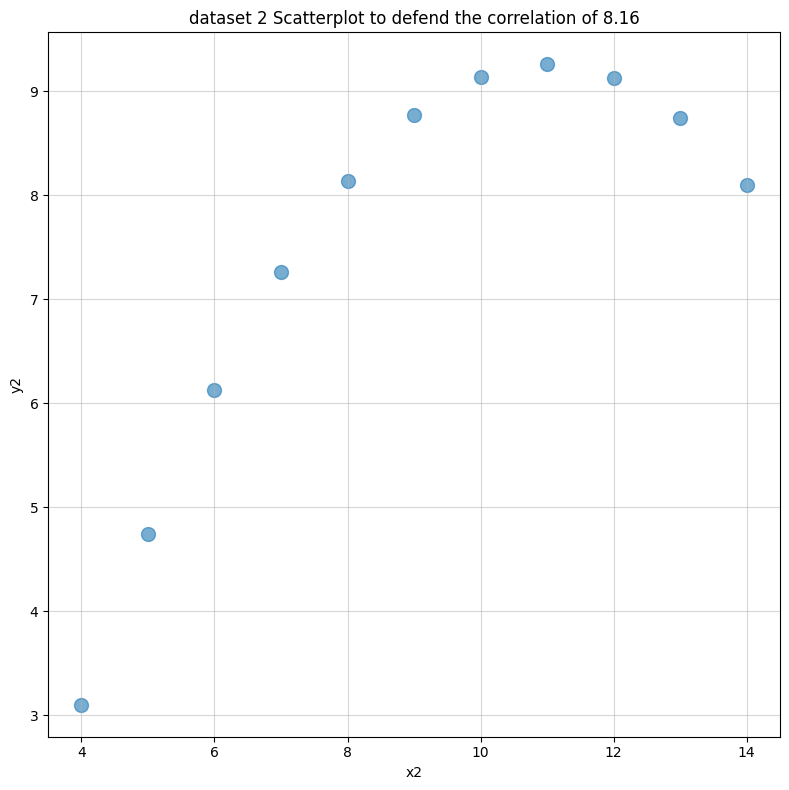

In [42]:
plt.figure(figsize = (8,8))
plt.scatter(dataset2_pd['x2'],dataset2_pd['y2'], alpha = 0.6, s=100)
plt.xlabel('x2')
plt.ylabel('y2')
plt.title("dataset 2 Scatterplot to defend the correlation of 8.16")
plt.grid(True, alpha = 0.5)
plt.tight_layout()

In [43]:
dataset3 = anscombe_df.select('x3','y3')
dataset3.show()

+----+-----+
|  x3|   y3|
+----+-----+
|10.0| 7.46|
| 8.0| 6.77|
|13.0|12.74|
| 9.0| 7.11|
|11.0| 7.81|
|14.0| 8.84|
| 6.0| 6.08|
| 4.0| 5.39|
|12.0| 8.15|
| 7.0| 6.42|
| 5.0| 5.73|
+----+-----+



In [44]:
summary = dataset3.select(
    mean('x3'), stddev('x3'), min('x3'), mean('y3'),stddev('y3') )
summary.show()

+-------+------------------+-------+-----------------+-----------------+
|avg(x3)|   stddev_samp(x3)|min(x3)|          avg(y3)|  stddev_samp(y3)|
+-------+------------------+-------+-----------------+-----------------+
|    9.0|3.3166247903553994|    4.0|7.500000000000001|2.030423601123667|
+-------+------------------+-------+-----------------+-----------------+



In [45]:
dataset3_pd = dataset3.toPandas()

In [46]:
dataset3_pd.describe()

,x3,y3
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [47]:
correlation = np.corrcoef(dataset3_pd['x3'], dataset3_pd['y3'])
correlation

array([[1.        , 0.81628674],
       [0.81628674, 1.        ]])

In [48]:
correlation = correlation[0,1]
correlation

np.float64(0.8162867394895982)

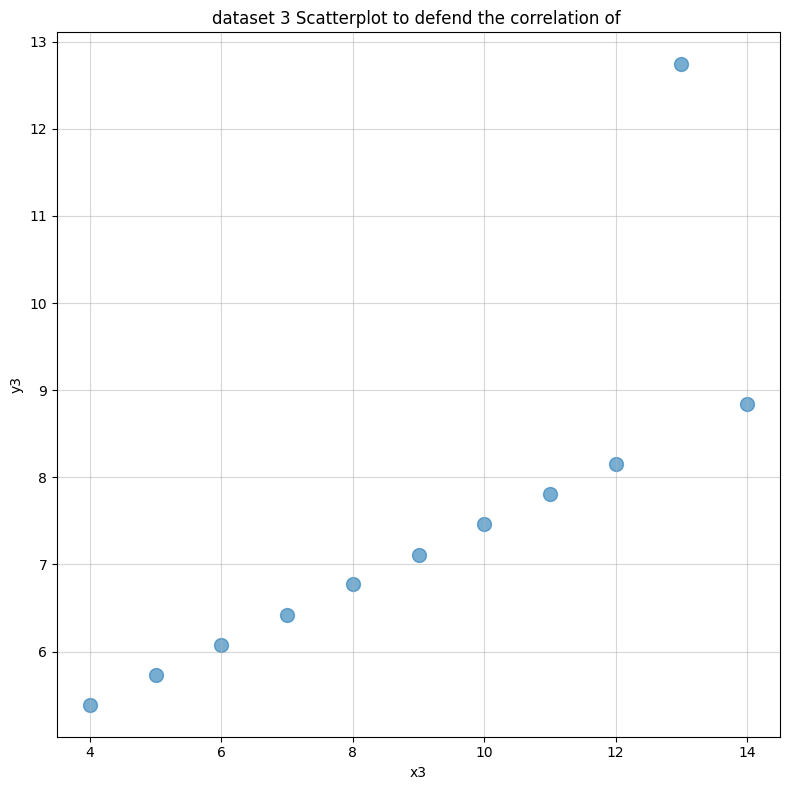

In [50]:
plt.figure(figsize = (8,8))
plt.scatter(dataset3_pd['x3'],dataset3_pd['y3'], alpha = 0.6, s=100)
plt.xlabel('x3')
plt.ylabel('y3')
plt.title("dataset 3 Scatterplot to defend the correlation of ")
plt.grid(True, alpha = 0.5)
plt.tight_layout()

In [52]:
dataset4 = anscombe_df.select('x4','y4')
dataset4.show()

+----+----+
|  x4|  y4|
+----+----+
| 8.0|6.58|
| 8.0|5.76|
| 8.0|7.71|
| 8.0|8.84|
| 8.0|8.47|
| 8.0|7.04|
| 8.0|5.25|
|19.0|12.5|
| 8.0|5.56|
| 8.0|7.91|
| 8.0|6.89|
+----+----+



In [54]:
summary = dataset4.select(
    mean('x4'), stddev('x4'), min('x4'), mean('y4'),stddev('y4') )
summary.show()

+-------+---------------+-------+----------------+------------------+
|avg(x4)|stddev_samp(x4)|min(x4)|         avg(y4)|   stddev_samp(y4)|
+-------+---------------+-------+----------------+------------------+
|    9.0|3.3166247903554|    8.0|7.50090909090909|2.0305785113876023|
+-------+---------------+-------+----------------+------------------+



In [55]:
dataset4_pd = dataset4.toPandas()

In [56]:
dataset4_pd.describe()

,x4,y4
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


In [58]:
correlation = np.corrcoef(dataset4_pd['x4'], dataset4_pd['y4'])
correlation

array([[1.        , 0.81652144],
       [0.81652144, 1.        ]])

In [59]:
correlation = correlation[0,1]
correlation

np.float64(0.816521436888503)

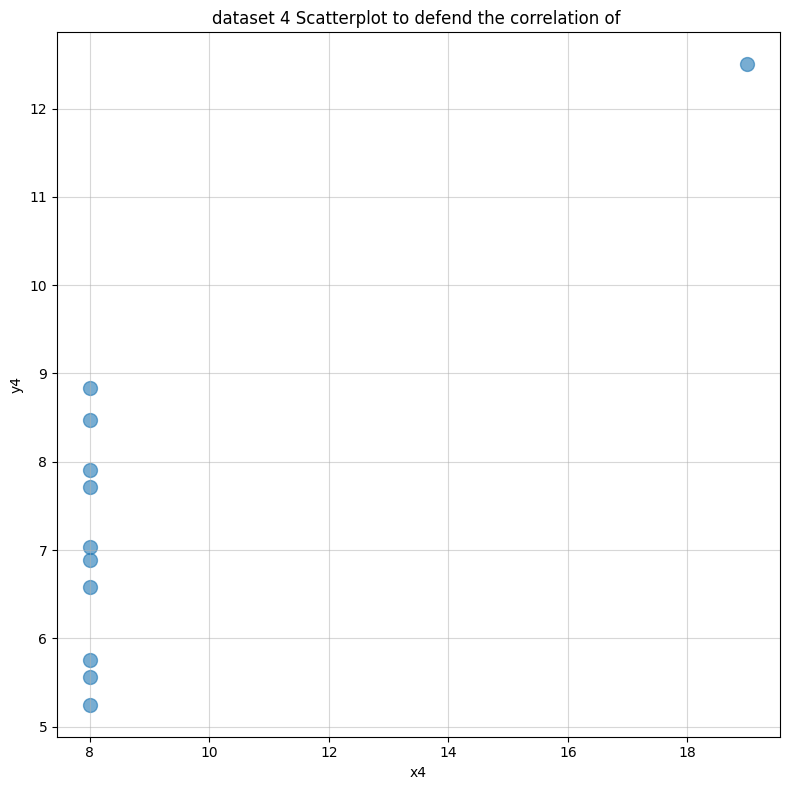

In [60]:
plt.figure(figsize = (8,8))
plt.scatter(dataset4_pd['x4'],dataset4_pd['y4'], alpha = 0.6, s=100)
plt.xlabel('x4')
plt.ylabel('y4')
plt.title("dataset 4 Scatterplot to defend the correlation of ")
plt.grid(True, alpha = 0.5)
plt.tight_layout()